In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
Rainfall = pd.read_csv("Rainfall.csv")

In [5]:
Rainfall.shape

(2200, 8)

In [6]:
Rainfall.head(4)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice


In [7]:
Rainfall.tail(4)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [8]:
Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<Axes: >

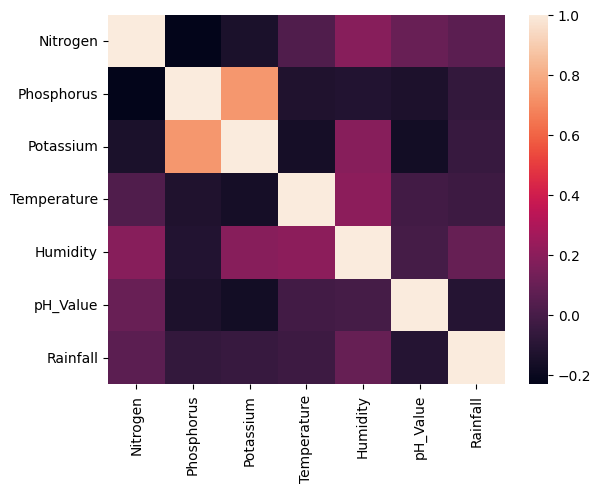

In [20]:
# Data visualization
numeric_columns = Rainfall.select_dtypes(include='number')
sns.heatmap(numeric_columns.corr())


In [23]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

x = np.array([[1, 'A', 3],
              [2, 'B', 4],
              [3, 'A', 5],
              [4, 'C', 6]])

labelencoder = LabelEncoder()
x[:, 1] = labelencoder.fit_transform(x[:, 1])

onehotencoder = OneHotEncoder(categories='auto', sparse=False)
X = onehotencoder.fit_transform(x[:, 1].reshape(-1, 1))
print(X)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [88]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X = X[:4]
y = y[:4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
#fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [103]:
#Predicting the test set result
y_pred = regressor.predict(X_test)
print(y_pred)


[0.61991673]


In [140]:
#calculating the coefficients
coefficients = (regressor.coef_)
print("Coefficients:", coefficients)

Coefficients: [ 0.65031701 -0.86786161 -0.67301979]


In [141]:
#calculating the intercept
coefficients = (regressor.intercept_)
print("Intercept:", intercept)

Intercept: 1.2369898401889237
